# Sensitivity of enrichment analysis to quality trimming

In this sheet we explore how trimming the gene-age data by various quality measures affects enrichment analysis of gene ontology and other terms

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### First we'll take a look at the data and the distributions of different quality measures

In [7]:
con = pd.read_csv("../main_HUMAN.csv",index_col=0)
con.head()

,Cellular_organisms,Euk+Bac,Euk_Archaea,Eukaryota,Opisthokonta,Eumetazoa,Vertebrata,Mammalia,modeAge,NumDBsContributing,...,RSD,EggNOG,Orthoinspector,Hieranoid_2,EnsemblCompara_v2,PANTHER8_all,Metaphors,PhylomeDB,Avg,HGT_flag
A0A075B6G5,0,0,0,0,0,1.000000,0,0.000000,Eumetazoa,1,...,1,1,1,1,1,1,27,12,1.916667,False
A0A075B6R3,0,0,0,0,0,0.000000,0,1.000000,Mammalia,2,...,1,1,1,1,37,1,1,1,1.333333,False
A0A0A0MR89,0,0,0,0,0,1.000000,0,0.000000,Eumetazoa,1,...,1,1,1,1,1,1,4,7,1.250000,False
A0A0A0MS98,0,0,0,0,0,0.454545,0,0.545455,Mammalia,11,...,0,1,11,0,10,16,0,18,5.076923,False
A0A0A0MSJ3,0,0,0,1,0,0.000000,0,0.000000,Eukaryota,2,...,1,1,1,1,1,1,7,2,1.538462,False


### Histogram of entropy values

This measure gives the Shannon entropy of the normalized distribution of age-calls from the different algorithms

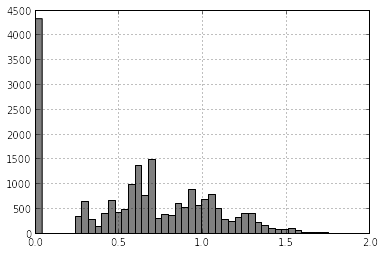

In [8]:
con["entropy"].hist(bins=50,color='grey')

### Histogram of the number of algorithms contributing to each gene's age call

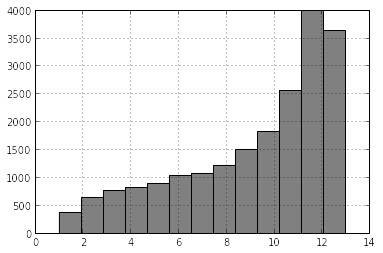

In [9]:
con["NumDBsContributing"].hist(bins=13,color='grey')

### Histogram of bimodality values

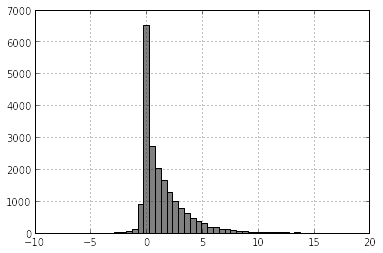

In [10]:
con["Bimodality"].hist(bins=50,color='grey')

# Filtering parameters

Now we define 5 different datasets with different amounts of quality filter, ranged from least to most stringent

### Dataset 1 - No filters
    - All proteins included
### Dataset 2 - Just entropy
    - Entropy: < 1
    - HGT: No filter
    - NumDBsContributing: No Filter
    - Bimodality: No Filter
### Dataset 3 - Just HGT flags
    - Entropy: No Filter
    - HGT: Remove flagged proteins
    - NumDBsContributing: No Filter
    - Bimodality: No Filter
### Dataset 4 - Just number of algorithms contributing to final age
    - Entropy: No Filter
    - HGT: No Filter
    - NumDBsContributing: > 3
    - Bimodality: No Filter
### Dataset 5 - Just bimodality metric
    - Entropy: No Filter
    - HGT: No Filter
    - NumDBsContributing: No Filter
    - Bimodality: < 5
### Dataset 6 - Filter on entropy, HGT flag, Num. algorithms, and bimodality
    - Entropy: < 1
    - HGT: Remove flagged proteins
    - NumDBsContributing: > 3
    - Bimodality: < 5

In [13]:
d1_archs = [prot for prot in con[con["modeAge"] == "Euk_Archaea"].index]
d1_bacs = [prot for prot in con[con["modeAge"] == "Euk+Bac"].index]

d2_archs = [prot for prot in con[(con["modeAge"] == "Euk_Archaea")
                                 & (con["entropy"]<1)].index]
d2_bacs = [prot for prot in con[(con["modeAge"] == "Euk+Bac")
                                 & (con["entropy"]<1)].index]

d3_archs = [prot for prot in con[(con["modeAge"] == "Euk_Archaea") & 
                                 (con["HGT_flag"] == False)].index]
d3_bacs = [prot for prot in con[(con["modeAge"] == "Euk+Bac") & 
                                (con["HGT_flag"] == False)].index]

d4_archs = [prot for prot in con[(con["modeAge"] == "Euk_Archaea") & 
                                 (con["NumDBsContributing"] > 3)].index]
d4_bacs = [prot for prot in con[(con["modeAge"] == "Euk+Bac") & 
                                (con["NumDBsContributing"] > 3)].index]

d5_archs = [prot for prot in con[(con["modeAge"] == "Euk_Archaea") & 
                                 (con["Bimodality"] < 5)].index]
d5_bacs = [prot for prot in con[(con["modeAge"] == "Euk+Bac") & 
                                 (con["Bimodality"] < 5)].index]

d6_archs = [prot for prot in con[(con["modeAge"] == "Euk_Archaea") & 
                                 (con["entropy"]<1) &
                                 (con["HGT_flag"] == False) &
                                 (con["Bimodality"] < 5) &
                                 (con["NumDBsContributing"] > 3)].index]
d6_bacs = [prot for prot in con[(con["modeAge"] == "Euk+Bac") & 
                                (con["entropy"]<1) &
                                (con["HGT_flag"] == False) &
                                (con["Bimodality"] < 5) &
                                (con["NumDBsContributing"] > 3)].index]

In [14]:
## Write out the data files for submission to g:Profiler

archs = [d1_archs,d2_archs,d3_archs,d4_archs,d5_archs,d6_archs]
bacs = [d1_bacs,d2_bacs,d3_bacs,d4_bacs,d5_bacs,d6_bacs]

for index,prots in enumerate(archs):
    with open("d%d_archs.txt" % (index+1),'w') as out:
        for i in prots:
            out.write(i+"\n")
            
for index,prots in enumerate(bacs):
    with open("d%d_bacs.txt" % (index+1),'w') as out:
        for i in prots:
            out.write(i+"\n")

## Enrichment

Enrichment values were calculated with g:Profiler (http://biit.cs.ut.ee/gprofiler/index.cgi)

Now we get the gProfiler output for each dataset, and see how the p-values change with trimming.

In [16]:
infiles = !ls *enrichment.txt
infiles

['d1_archs_enrichment.txt',
 'd1_bacs_enrichment.txt',
 'd2_archs_enrichment.txt',
 'd2_bacs_enrichment.txt',
 'd3_archs_enrichment.txt',
 'd3_bacs_enrichment.txt',
 'd4_archs_enrichment.txt',
 'd4_bacs_enrichment.txt',
 'd5_archs_enrichment.txt',
 'd5_bacs_enrichment.txt',
 'd6_archs_enrichment.txt',
 'd6_bacs_enrichment.txt']

### Store the datasets in a dictionary

In [18]:
dsets = dict(zip(
    ["_".join(i.split("_")[:2]) for i in infiles],
    [pd.read_table(i) for i in infiles]))

dsets['d1_archs'].head()

,p-value,T,Q,Q&T,Q&T/Q,Q&T/T,term ID,t type,t group,t name,t depth,Q&T list
0,0.021200,197,204,11,0.054,0.056,GO:0006576,BP,141,cellular biogenic amine metabolic process,1,"P20618,P25789,P25788,P60900,O14818,P25787,P497..."
1,0.000004,85,204,11,0.054,0.129,GO:0006595,BP,141,polyamine metabolic process,2,"P20618,P25789,P25788,P60900,O14818,P25787,P497..."
2,0.000153,120,204,11,0.054,0.092,GO:0031145,BP,164,anaphase-promoting complex-dependent protea...,1,"P20618,P25789,P25788,P60900,O14818,P25787,P497..."
3,0.000513,107,204,10,0.049,0.093,GO:0038061,BP,33,NIK/NF-kappaB signaling,1,"P20618,P25789,P25788,P60900,O14818,P25787,P497..."
4,0.027900,5,204,3,0.015,0.600,GO:0071038,BP,175,nuclear polyadenylation-dependent tRNA cata...,1,"Q9NQT5,Q96B26,Q13868"


In [19]:
for df in dsets:
    dsets[df].sort(["t type","p-value"],inplace=True)

In [20]:
## Write data files once they've been sorted

for df in dsets:
    dsets[df].to_csv(df+"_sorted.csv")

### Create datasets that give the p-value for each term from each of the five datasets

First define a function to munge the data. It selects one of the two kingdoms, 'bacs' or 'archs' (which is all we are investigating here), and one of the enrichment databases or GO terms (default "BP": biological process).

The p-values are converted to negative log10. It also adds a column that is the difference between dataset 1 and dataset 5.

In [21]:
def pValue_series(data_sets,kingdom='archs',t_type="BP"):
    is_first = True
    for df in sorted(data_sets.keys()):
        if kingdom not in df: # ignore other kingdom, 'arch' or 'bac'
            continue
        trimdf = data_sets[df][data_sets[df]["t type"] == t_type]
        trimdf.loc[:,"name"] = trimdf["t name"].map(lambda x: x.strip())
        trimdf.loc[:,"log p-value"] = trimdf["p-value"].map(lambda x: -(np.log10(x)))
        if is_first:
            pvalues = trimdf[["name","log p-value"]].set_index("name")
            pvalues.columns = ["log p-value" + "_" + df]
            is_first = False
        else:
            temp = trimdf[["name","log p-value"]].set_index("name")
            temp.columns = ["log p-value" + "_" + df]
            pvalues = pd.concat([pvalues,temp],axis=1,copy=False)

    pvalues.loc[:,"diff"] = pvalues.ix[:,0] - pvalues.ix[:,-1]
    pvalues.sort("diff",inplace=True)
    
    return pvalues

### P-value series

This is what the output looks like. Note that if the column "diff" is negative, it means that the heavy filtering on dataset 5 gave a stronger p-value.

In [23]:
archs_pvalues_BP = pValue_series(dsets)
archs_pvalues_BP.head(n=10)

,log p-value_d1_archs,log p-value_d2_archs,log p-value_d3_archs,log p-value_d4_archs,log p-value_d5_archs,log p-value_d6_archs,diff
RNA metabolic process,8.892790,11.534617,9.195179,11.136677,8.330683,15.441291,-6.548501
cellular macromolecule metabolic process,18.772113,15.714443,19.583359,24.767004,18.675718,24.809668,-6.037555
macromolecule metabolic process,16.469800,14.415669,17.286509,21.051098,16.565431,22.175224,-5.705423
gene expression,16.939302,17.815309,17.431798,20.057000,15.614394,22.501689,-5.562387
cellular metabolic process,11.623423,9.545155,11.248721,17.525784,11.913640,16.841638,-5.218214
nucleic acid metabolic process,16.856985,16.403403,17.326058,20.427128,16.585027,22.034798,-5.177813
organic substance metabolic process,11.212540,9.698970,10.856985,15.946922,11.630784,15.943095,-4.730556
primary metabolic process,11.718967,9.779892,11.347754,17.009217,12.047692,16.428291,-4.709325
metabolic process,11.531653,9.268411,11.216096,16.175874,11.806875,15.752027,-4.220374
macromolecule biosynthetic process,10.954677,11.171340,11.326058,13.795880,10.138466,14.962574,-4.007896


In [24]:
bacs_pvalues_BP = pValue_series(dsets,'bacs')

In [25]:
archs_pvalues_CC = pValue_series(dsets,'archs',"CC")
bacs_pvalues_CC = pValue_series(dsets,'bacs',"CC")

In [26]:
#Write out p-value series

archs_pvalues_BP.to_csv("archs_p-values_BP.csv")
bacs_pvalues_BP.to_csv("bacs_p-values_BP.csv")
archs_pvalues_CC.to_csv("archs_p-values_CC.csv")
bacs_pvalues_CC.to_csv("bacs_p-values_CC.csv")

### Pick a few representative enrichment terms and plot them

In [28]:
def plot_it(df,term,style='-',label=None):
    df = df.fillna(0)
    row = df.ix[term,:-1]
    row.index = [i.split("_")[-2] for i in row.index]
    row.plot(style=style,label=label,color='black',linewidth=2)
    plt.xticks(rotation=70)
    plt.xlabel("Dataset")
    plt.ylabel("-log10(p-value)")

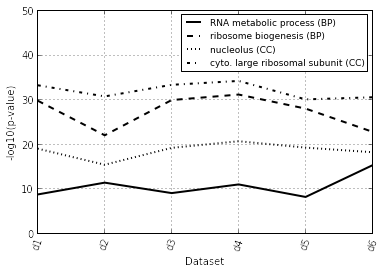

In [40]:
plot_it(archs_pvalues_BP,"RNA metabolic process",label="RNA metabolic process (BP)")
plot_it(archs_pvalues_BP,"ribosome biogenesis",style='--',label="ribosome biogenesis (BP)")
plot_it(archs_pvalues_CC,"nucleolus",style=':',label="nucleolus (CC)")
plot_it(archs_pvalues_CC,"cytosolic large ribosomal subunit",style='-.',label="cyto. large ribosomal subunit (CC)")

plt.legend(loc=0,prop={'size':9})
ax = plt.gca()
ax.set_ylim([0,50])

#plt.savefig("Archaea_p-values.svg")

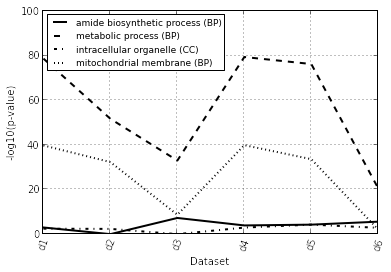

In [41]:
plot_it(bacs_pvalues_BP,"amide biosynthetic process",label="amide biosynthetic process (BP)")
plot_it(bacs_pvalues_BP,"metabolic process",style='--',label="metabolic process (BP)")
plot_it(bacs_pvalues_CC,"intracellular organelle",style='-.',label="intracellular organelle (CC)")
plot_it(bacs_pvalues_BP,"catabolic process",style=':',label="mitochondrial membrane (BP)")

plt.legend(loc=2,prop={'size':9})

ax = plt.gca()
ax.set_ylim([0,100])

#plt.savefig("Bacteria_p-values.svg")

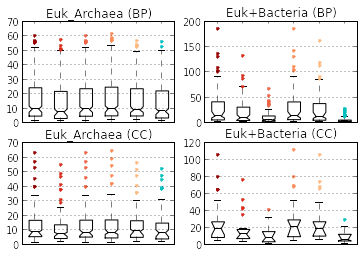

In [43]:
fig,axes = plt.subplots(2,2)

dfs_names = zip(["Euk_Archaea (BP)", "Euk+Bacteria (BP)","Euk_Archaea (CC)","Euk+Bacteria (CC)"],
    [archs_pvalues_BP,bacs_pvalues_BP,archs_pvalues_CC,bacs_pvalues_CC])

# Greys
# flier_colors = ["#252525","#252525","#636363","#636363","#969696","#969696","#bdbdbd","#bdbdbd","#d9d9d9","#d9d9d9"]

flier_colors = ["#990000","#990000","#d7301f","#d7301f","#ef6548","#ef6548","#fc8d59","#fc8d59","#fdbb84","#fdbb84"]

index=0
for name,df in dfs_names:
    colors = dict(boxes='black',caps='black',medians='black',whiskers='grey')
    ax = axes.flat[index]
    df = df.dropna()
    df = df.ix[:,:-1]
    df.columns = [i.split("_")[1] for i in df.columns]
    box1 = df.plot(kind='box',ax=ax,notch=True,sym=".",color=colors,return_type='dict',bootstrap=5000)
    for col,flier in zip(flier_colors,box1['fliers']):
        plt.setp(flier,color=col)
    ax.set_title(name)
    ax.get_xaxis().set_ticks([])
    index += 1
    
#plt.savefig("avg_p-values.svg")